### ASOS 기상관측 데이터 추가 수집
- 데이터 추가 수집

In [1]:
import pandas as pd
import glob, os
import warnings
warnings.filterwarnings("ignore")
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings("ignore")

In [203]:
input_file = r'C:\Users\kimy\smart_farm\ASOS' 

all_file_list = glob.glob(os.path.join(input_file, 'SURFACE*'))
all_data = []

for file in all_file_list:
    df = pd.read_csv(file,encoding="cp949")
    all_data.append(df)

In [204]:
data = pd.concat(all_data, axis=0, ignore_index=True)
data = data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
# 중복제거까지

이미 데이터가 일부 존재하기에 현지기압/해면기압/일조/누적강수량 사용

In [205]:
data.columns = ["지점","시간","기온","누적강수량","풍향","풍속","현지기압","해면기압","습도","일사","일조"]
data.drop(["기온","풍속","풍향","습도","일사"],axis=1,inplace = True)

In [206]:
data["시간"] = data["시간"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d %H:%M'))

In [207]:
data.isnull().sum()

지점          0
시간          0
누적강수량    1559
현지기압        0
해면기압        0
일조          1
dtype: int64

In [208]:
data[data["시간"] == "2021-11-29 04:03:00"]

,지점,시간,누적강수량,현지기압,해면기압,일조
40542,192,2021-11-29 04:03:00,0.0,1026.8,1030.6,0.0


#### 학습,예측용 데이터의 시간과 매핑해보기

In [2]:
from datetime import datetime

In [3]:
train = pd.read_csv("smart_farm_train_nonull.csv")
test = pd.read_csv("smart_farm_test.csv")

In [4]:
print(train.shape)
print(test.shape)

(110908, 25)
(20160, 25)


In [5]:
train["시간"] = train["시간"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
test["시간"] = test["시간"].apply(lambda x : datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [6]:
train_test = pd.concat([train,test],axis=0,ignore_index=True)

In [214]:
# train_test.iloc[:110908,:] 학습용 데이터
# train_test.iloc[110908:,:]

추가로 수집한 데이터와 연결하기

In [215]:
train_test_merge = pd.merge(train_test,data,on="시간",how="left")
train_test_merge

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh),지점,누적강수량,현지기압,해면기압,일조
0,2021-11-26 00:00:00,2021-11-26 00:00:00,2021,11,26,0,0,-2.7,5.8,67,...,1.0,0.0,28.0,18.0,0.9,192.0,0.0,1018.2,1021.9,29180.0
1,2021-11-26 00:01:00,2021-11-26 00:00:00,2021,11,26,0,1,-2.9,5.8,67,...,1.0,0.0,28.0,18.0,0.9,192.0,0.0,1018.2,1021.9,0.0
2,2021-11-26 00:02:00,2021-11-26 00:00:00,2021,11,26,0,2,-3.0,5.7,67,...,1.0,1.0,28.0,18.0,0.9,192.0,0.0,1018.1,1021.8,0.0
3,2021-11-26 00:03:00,2021-11-26 00:00:00,2021,11,26,0,3,-3.0,5.7,67,...,1.0,1.0,28.0,18.0,0.8,192.0,0.0,1018.1,1021.8,0.0
4,2021-11-26 00:04:00,2021-11-26 00:00:00,2021,11,26,0,4,-2.8,5.7,67,...,1.0,1.0,28.0,18.0,1.0,192.0,0.0,1018.1,1021.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131063,2022-01-29 23:55:00,2022-01-29 00:00:00,2022,1,29,23,55,-2.1,1.7,33,...,1.0,1.0,28.0,18.0,NaN,192.0,0.0,1016.7,1020.4,27581.0
131064,2022-01-29 23:56:00,2022-01-29 00:00:00,2022,1,29,23,56,-2.2,1.7,33,...,1.0,1.0,28.0,18.0,NaN,192.0,0.0,1016.7,1020.4,27581.0
131065,2022-01-29 23:57:00,2022-01-29 00:00:00,2022,1,29,23,57,-2.3,1.7,33,...,1.0,1.0,28.0,18.0,NaN,192.0,0.0,1016.6,1020.3,27581.0
131066,2022-01-29 23:58:00,2022-01-29 00:00:00,2022,1,29,23,58,-2.3,1.6,33,...,1.0,1.0,28.0,18.0,NaN,192.0,0.0,1016.6,1020.3,27581.0


일조량 데이터의 그래프 확인

<AxesSubplot:xlabel='시간'>

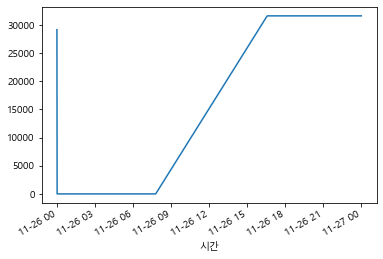

In [216]:
train_test_merge[train_test_merge["년월일"] == "2021-11-26 00:00:00"].set_index("시간")["일조"].plot()

결합한 데이터에 대해서 결측치 확인
- 일부 시간대의 경우 지점에서 결측치가 발생함
- 11월 29일 새벽 4시 0분 ,1분, 2분, 3분 중에서 2분이 결측치인 상태
- 지점~일조까지는 앞뒤 평균으로 해결하기

In [217]:
def get_결측치(data):
    
    측정목록 = ['지점','내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
                   '환기온도(천창 제어온도)', '난방온도(설정온도)','누적강수량', '현지기압','해면기압', '일조']
    결과리스트 = []

    # 데이터프레임 copy하기
    df = data.copy()
    
    for 항목 in 측정목록:
        for idx,row in df[df[항목].isnull()].iterrows():
            
            if df.loc[idx+1,항목] != np.nan:
                
                if df.loc[idx-1,항목] != np.nan:
                    
                    df.loc[idx,항목] = ( df.loc[idx+1,항목]+df.loc[idx-1,항목] ) / 2
                    
    결과리스트.append(df)
    
    return pd.concat(결과리스트,axis=0,ignore_index = False)

In [218]:
train_test_merge.isnull().sum()

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도               15
내부 습도               15
차광스크린(수평)           15
차열스크린(수평)           15
에너지스크린(수평)          15
에너지스크린(수직)          15
배기팬                 15
천창                  15
유동팬                 15
팬코일 B동              15
환기온도(천창 제어온도)       16
난방온도(설정온도)          16
열공급량(kWh)        20160
지점                1414
누적강수량             1978
현지기압              1414
해면기압              1414
일조                1415
dtype: int64

In [219]:
train_test_merge[train_test_merge["지점"].isnull()]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh),지점,누적강수량,현지기압,해면기압,일조
4473,2021-11-29 04:02:00,2021-11-29 00:00:00,2021,11,29,4,2,-3.9,-0.3,90,...,1.0,1.0,28.0,18.0,0.8,NaN,NaN,NaN,NaN,NaN
5093,2021-11-29 14:23:00,2021-11-29 00:00:00,2021,11,29,14,23,434.0,16.1,30,...,1.0,0.0,30.0,20.0,0.0,NaN,NaN,NaN,NaN,NaN
8300,2021-12-01 22:03:00,2021-12-01 00:00:00,2021,12,1,22,3,-3.1,1.0,46,...,1.0,1.0,28.0,18.0,0.2,NaN,NaN,NaN,NaN,NaN
12256,2021-12-04 16:01:00,2021-12-04 00:00:00,2021,12,4,16,1,154.0,10.2,44,...,1.0,1.0,30.0,20.0,0.1,NaN,NaN,NaN,NaN,NaN
25026,2021-12-13 13:02:00,2021-12-13 00:00:00,2021,12,13,13,2,572.0,7.4,21,...,1.0,0.0,30.0,20.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124071,2022-01-25 03:23:00,2022-01-25 00:00:00,2022,1,25,3,23,-2.8,1.7,73,...,1.0,0.0,28.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
124780,2022-01-25 15:12:00,2022-01-25 00:00:00,2022,1,25,15,12,122.0,8.4,56,...,1.0,1.0,30.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
126509,2022-01-26 20:01:00,2022-01-26 00:00:00,2022,1,26,20,1,-3.1,3.6,56,...,1.0,0.0,28.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
128734,2022-01-28 09:06:00,2022-01-28 00:00:00,2022,1,28,9,6,352.0,2.6,35,...,1.0,1.0,27.0,20.1,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
data.iloc[40540:40545,:]

,지점,시간,누적강수량,현지기압,해면기압,일조
40540,192,2021-11-29 04:00:00,0.0,1026.8,1030.6,0.0
40541,192,2021-11-29 04:01:00,0.0,1026.8,1030.6,0.0
40542,192,2021-11-29 04:03:00,0.0,1026.8,1030.6,0.0
40543,192,2021-11-29 04:04:00,0.0,1026.8,1030.6,0.0
40544,192,2021-11-29 04:05:00,0.0,1026.8,1030.6,0.0


In [221]:
train_test_merge = get_결측치(train_test_merge)

In [222]:
train_test_merge.isnull().sum()
# 여전히 1386개 정도의 결측 존재

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도               12
내부 습도               12
차광스크린(수평)           12
차열스크린(수평)           12
에너지스크린(수평)          12
에너지스크린(수직)          12
배기팬                 12
천창                  12
유동팬                 12
팬코일 B동              12
환기온도(천창 제어온도)       12
난방온도(설정온도)          12
열공급량(kWh)        20160
지점                1386
누적강수량             1950
현지기압              1386
해면기압              1386
일조                1386
dtype: int64

In [240]:
train_test_merge[train_test_merge["지점"].isnull()]["년월일"].value_counts()

2021-12-31 00:00:00    1380
2022-02-24 00:00:00       3
2022-01-11 00:00:00       2
2022-01-01 00:00:00       1
Name: 년월일, dtype: int64

#### 12월31일 -> 시계열 예측

In [235]:
train_test_merge[train_test_merge["년월일"] == "2021-12-31 00:00:00"]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh),지점,누적강수량,현지기압,해면기압,일조
118108,2021-12-31 00:00:00,2021-12-31 00:00:00,2021,12,31,0,0,-2.3,0.8,50,...,1.0,1.0,28.0,18.0,NaN,192.0,0.0,1022.2,1025.9,27845.0
118109,2021-12-31 00:01:00,2021-12-31 00:00:00,2021,12,31,0,1,-2.3,0.8,50,...,1.0,1.0,28.0,18.0,NaN,192.0,0.0,1022.1,1025.8,0.0
118110,2021-12-31 00:02:00,2021-12-31 00:00:00,2021,12,31,0,2,-2.3,0.8,50,...,1.0,1.0,28.0,18.0,NaN,192.0,0.0,1022.1,1025.8,0.0
118111,2021-12-31 00:03:00,2021-12-31 00:00:00,2021,12,31,0,3,-2.5,0.8,50,...,1.0,1.0,28.0,18.0,NaN,192.0,0.0,1022.1,1025.8,0.0
118112,2021-12-31 00:04:00,2021-12-31 00:00:00,2021,12,31,0,4,-2.5,0.7,50,...,1.0,1.0,28.0,18.0,NaN,192.0,0.0,1022.0,1025.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119543,2021-12-31 23:55:00,2021-12-31 00:00:00,2021,12,31,23,55,-2.8,-2.4,39,...,1.0,1.0,28.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
119544,2021-12-31 23:56:00,2021-12-31 00:00:00,2021,12,31,23,56,-2.9,-2.4,39,...,1.0,1.0,28.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
119545,2021-12-31 23:57:00,2021-12-31 00:00:00,2021,12,31,23,57,-2.9,-2.4,39,...,1.0,1.0,28.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
119546,2021-12-31 23:58:00,2021-12-31 00:00:00,2021,12,31,23,58,-3.0,-2.4,39,...,1.0,1.0,28.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
train_test_merge[train_test_merge["시간"] == "2021-12-26 04:49:00"]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh),지점,누적강수량,현지기압,해면기압,일조
111197,2021-12-26 04:49:00,2021-12-26 00:00:00,2021,12,26,4,49,-3.1,-7.4,40,...,1.0,1.0,28.0,18.0,NaN,192.0,0.0,1029.0,1032.9,0.0


In [224]:
train_test_merge[train_test_merge["내부 온도"].isnull()]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh),지점,누적강수량,현지기압,해면기압,일조
111198,2021-12-26 04:50:00,2021-12-26 00:00:00,2021,12,26,4,50,-3.1,-7.5,40,...,NaN,NaN,NaN,NaN,NaN,192.0,0.0,1028.9,1032.8,0.0
111199,2021-12-26 04:51:00,2021-12-26 00:00:00,2021,12,26,4,51,-3.0,-7.4,40,...,NaN,NaN,NaN,NaN,NaN,192.0,0.0,1029.0,1032.9,0.0
112638,2021-12-27 04:50:00,2021-12-27 00:00:00,2021,12,27,4,50,-3.4,-7.7,66,...,NaN,NaN,NaN,NaN,NaN,192.0,0.0,1027.3,1031.2,0.0
112639,2021-12-27 04:51:00,2021-12-27 00:00:00,2021,12,27,4,51,-3.5,-7.7,66,...,NaN,NaN,NaN,NaN,NaN,192.0,0.0,1027.4,1031.3,0.0
115518,2021-12-29 04:50:00,2021-12-29 00:00:00,2021,12,29,4,50,-2.3,-2.6,86,...,NaN,NaN,NaN,NaN,NaN,192.0,0.0,1019.4,1023.2,0.0
115519,2021-12-29 04:51:00,2021-12-29 00:00:00,2021,12,29,4,51,-2.4,-2.6,86,...,NaN,NaN,NaN,NaN,NaN,192.0,0.0,1019.4,1023.2,0.0
118398,2021-12-31 04:50:00,2021-12-31 00:00:00,2021,12,31,4,50,-3.8,-1.8,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118399,2021-12-31 04:51:00,2021-12-31 00:00:00,2021,12,31,4,51,-3.8,-1.8,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121278,2022-01-23 04:50:00,2022-01-23 00:00:00,2022,1,23,4,50,-2.6,2.0,76,...,NaN,NaN,NaN,NaN,NaN,192.0,0.0,1019.0,1022.7,0.0
121279,2022-01-23 04:51:00,2022-01-23 00:00:00,2022,1,23,4,51,-2.5,2.0,76,...,NaN,NaN,NaN,NaN,NaN,192.0,0.0,1019.0,1022.7,0.0


### 고민의 지점 1
- 해당 데이터를 사용할지?
- 사용한다면 결측을 어떻게 해결할지 -> 해당 10분 / 30분 / 1시간 이내에 결측이 없는 행의 데이터 사용해보기
- 다른 결측치 처리 방법이 있을까..?


### 고민의 지점 2
- 예측용 데이터에도 존재하는 NaN이 다수인 결측행
- 어떻게 처리할지? 아예 뺄 수는 없음
- 그대로 예측할지? 아니면 일 평균 혹은 근처의 시간대 평균으로 채워줄지

### 진주 지역의 측정소 정보 가져오기

- 대안동
- 상대동(진주)
- 상봉동
- 정촌면

In [1]:
import urllib
from urllib.parse import urlencode, quote_plus
import requests
from bs4 import BeautifulSoup
import json
from pandas import json_normalize

In [2]:
import requests
ServiceKey = "/Vg1J8MmKzuTqcg1RFWfc3U7B6OLQGu28VZvd9EkkL7l0+IYsdB5Oe0eTm85cUMsNyjZVrFo7GC8fKNxLqKRDA=="

url = 'http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/getMsrstnList'
params ={'serviceKey' : ServiceKey,
         'returnType' : 'json',
         'numOfRows' : '100',
         'pageNo' : '1',
         'addr' : '경남'}

response = requests.get(url, params=params)
info = json.loads(response.content)
res_df = json_normalize(info["response"]["body"]["items"])

In [3]:
경남 = res_df[res_df["addr"].str.contains("진주")]

In [4]:
경남

,dmX,item,mangName,year,addr,stationName,dmY
29,35.195891,"SO2, CO, O3, NO2, PM10, PM2.5",도시대기,1995,경남 진주시 북장대로64번길 14중앙119안전센터 옥상 (봉곡동),상봉동,128.074596
30,35.193333,"SO2, CO, O3, NO2, PM10, PM2.5",도시대기,1997,경남 진주시 진주대로 1052(중소기업은행),대안동,128.084167
31,35.180609,"SO2, CO, O3, NO2, PM10, PM2.5",도시대기,1998,경남 진주시 동진로 279(한국전력공사 진주지점),상대동(진주),128.121781
32,35.1246016667,"SO2, CO, O3, NO2, PM10, PM2.5",도시대기,2020,경남 진주시 정촌면 예하리 1340예하초등학교 앞 공원 지상,정촌면,128.09992247


In [15]:
input_file = r'C:\Users\kimhy\smart_farm\airkorea' 

all_file_list = glob.glob(os.path.join(input_file, 'last*'))
all_data = []

for file in all_file_list:
    df = pd.read_csv(file,encoding="utf-8-sig")
    df["지점"] = df.columns[0]
    
    df.columns = ["시간",'등급', '1시간', '등급.1', '1시간.1', '등급.2', '1시간.2', '등급.3', '1시간.3', '등급.4',
       '1시간.4', '등급.5', '1시간.5',"지점"]
    
    all_data.append(df)

In [16]:
data = pd.concat(all_data, axis=0, ignore_index=True)
data = data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True).sort_values("시간")
# 중복제거까지

data = data[data["시간"].notnull()].reset_index(drop=True)

data.columns = ["시간","PM10등급","PM10_1시간","PM25등급","PM25_1시간","오존등급","오존_1시간","이산화질소등급","이산화질소_1시간"
               ,"일산화탄소등급","일산화탄소_1시간","아황산가스등급","아황산가스_1시간","지점"]

In [17]:
data_산청읍 = data[data["지점"] == "산청읍"].reset_index(drop=True)

In [10]:
data_대안동 = data[data["지점"] == "대안동"].reset_index(drop=True)
data_상봉동 = data[data["지점"] == "상봉동"].reset_index(drop=True)
data_상대동 = data[data["지점"] == "상대동"].reset_index(drop=True)
data_정촌면 = data[data["지점"] == "정촌면"].reset_index(drop=True)

In [18]:
data_산청읍.isnull().sum()

시간            0
PM10등급       73
PM10_1시간     73
PM25등급       96
PM25_1시간     96
오존등급         28
오존_1시간       28
이산화질소등급      28
이산화질소_1시간    28
일산화탄소등급      41
일산화탄소_1시간    41
아황산가스등급      28
아황산가스_1시간    28
지점            0
dtype: int64

In [11]:
for i in [data_대안동,data_상봉동,data_상대동,data_정촌면]:
    print("##################################")
    print(i.isnull().sum())

##################################
시간             0
PM10등급        74
PM10_1시간      74
PM25등급       226
PM25_1시간     226
오존등급          29
오존_1시간        29
이산화질소등급       29
이산화질소_1시간     29
일산화탄소등급       29
일산화탄소_1시간     29
아황산가스등급       29
아황산가스_1시간     29
지점             0
dtype: int64
##################################
시간            0
PM10등급       10
PM10_1시간     10
PM25등급       54
PM25_1시간     54
오존등급          8
오존_1시간        8
이산화질소등급       8
이산화질소_1시간     8
일산화탄소등급       8
일산화탄소_1시간     8
아황산가스등급       8
아황산가스_1시간     8
지점            0
dtype: int64
##################################
시간            0
PM10등급       56
PM10_1시간     56
PM25등급       62
PM25_1시간     62
오존등급         20
오존_1시간       20
이산화질소등급      20
이산화질소_1시간    20
일산화탄소등급      20
일산화탄소_1시간    20
아황산가스등급      20
아황산가스_1시간    20
지점            0
dtype: int64
##################################
시간             0
PM10등급        63
PM10_1시간      63
PM25등급       130
PM25_1시간     130
오존등급          29
오존_1시간        29
이산화질소등급       29

In [19]:
def get_미세먼지_결측치(data):
    
    측정목록 = ['PM10_1시간','PM25_1시간','오존_1시간','이산화질소_1시간',"일산화탄소_1시간","아황산가스_1시간"]
    결과리스트 = []

    # 데이터프레임 copy하기
    df = data.copy()
    
    for 항목 in 측정목록:
        for idx,row in df[df[항목].isnull()].iterrows():
            
            if df.loc[idx+1,항목] != np.nan:
                
                if df.loc[idx-1,항목] != np.nan:
                    
                    df.loc[idx,항목] = ( df.loc[idx+1,항목]+df.loc[idx-1,항목] ) / 2
                    
    결과리스트.append(df)
    
    return pd.concat(결과리스트,axis=0,ignore_index = False)

In [20]:
data_산청읍 = get_미세먼지_결측치(data_산청읍)

In [269]:
data_대안동 = get_미세먼지_결측치(data_대안동)
data_상봉동 = get_미세먼지_결측치(data_상봉동)
data_상대동 = get_미세먼지_결측치(data_상대동)
data_정촌면 = get_미세먼지_결측치(data_정촌면)

In [21]:
data_산청읍.isnull().sum()

시간            0
PM10등급       73
PM10_1시간     68
PM25등급       96
PM25_1시간     68
오존등급         28
오존_1시간       23
이산화질소등급      28
이산화질소_1시간    23
일산화탄소등급      41
일산화탄소_1시간    36
아황산가스등급      28
아황산가스_1시간    23
지점            0
dtype: int64

In [270]:
for i in [data_대안동,data_상봉동,data_상대동,data_정촌면]:
    print("##################################")
    print(i.isnull().sum())

##################################
시간             0
PM10등급        74
PM10_1시간      72
PM25등급       226
PM25_1시간     175
오존등급          29
오존_1시간        27
이산화질소등급       29
이산화질소_1시간     27
일산화탄소등급       29
일산화탄소_1시간     27
아황산가스등급       29
아황산가스_1시간     27
지점             0
dtype: int64
##################################
시간            0
PM10등급       10
PM10_1시간      6
PM25등급       54
PM25_1시간     29
오존등급          8
오존_1시간        2
이산화질소등급       8
이산화질소_1시간     2
일산화탄소등급       8
일산화탄소_1시간     2
아황산가스등급       8
아황산가스_1시간     2
지점            0
dtype: int64
##################################
시간            0
PM10등급       56
PM10_1시간     51
PM25등급       62
PM25_1시간     51
오존등급         20
오존_1시간       14
이산화질소등급      20
이산화질소_1시간    14
일산화탄소등급      20
일산화탄소_1시간    14
아황산가스등급      20
아황산가스_1시간    14
지점            0
dtype: int64
##################################
시간             0
PM10등급        63
PM10_1시간      60
PM25등급       130
PM25_1시간      87
오존등급          29
오존_1시간        21
이산화질소등급       29

### 제어조건을 기반으로 한 파생변수 생성

1. 차열스크린
  - 광도조절(800w/m²=100%개방, 1000w/m²=70%개방, 1100W/m²=30%개방, 1200W/m²=0%개방)
  - 온도조절(23도=100%개방, 25도=60%개방, 26도=0개방) 
2. 차광스크린
 * 주간(일출3시간후~ 일몰3시간후) 
  - 광도조절(1000W/m² = 100%개방, 1400W/m²=80%개방, 15 00W/m²=30%개방, 1600W/m²=0%개방)
 * 야간(일몰3시간후~일출1시간후)
  - 온도조절(내부온도  27도 이상시 100%개방)
3. 에너지스크린
  - 겨울철 난방에너지 저감을 위한 보온을 목적으로 일몰 1시간 30분전 닫음
4. 팬코일
  - 난방온도 이하시 열공급을 위해 가동(에너지소비량과 밀접한 영향이 있음)
5. 천창 및 배기팬
  - 온실내부가 환기온도 이상으로 상승시 동시 작동(천창개방, 배기팬 작동)
6. 유동팬
  - 내부공기를 적절히 혼합시키기위해 작동

In [104]:
train_test.columns

Index(['시간', '년월일', '년도', '월', '일', '시', '분', '일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
       '환기온도(천창 제어온도)', '난방온도(설정온도)', '열공급량(kWh)'],
      dtype='object')

In [105]:
train_test["차열스크린(수평)"].describe()

count    131053.000000
mean         41.644052
std          48.766469
min           0.000000
25%           0.000000
50%           0.000000
75%         100.000000
max         100.000000
Name: 차열스크린(수평), dtype: float64

#### 일출, 일몰 데이터 추가하기

In [106]:
sunrise = pd.read_csv("sunset_sunrise_data.csv")
sunrise.columns = ["년월일","일출시간","일몰시간"]

In [107]:
sunrise.head()

,년월일,일출시간,일몰시간
0,20211126,713,1717
1,20211127,714,1716
2,20211128,715,1716
3,20211129,716,1716
4,20211130,717,1716


In [108]:
for col in sunrise.columns:
    sunrise[col] = sunrise[col].astype(str)
sunrise["년월일"] = sunrise["년월일"].apply(lambda x : datetime.strptime(x,'%Y%m%d'))

In [109]:
sunrise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년월일     95 non-null     datetime64[ns]
 1   일출시간    95 non-null     object        
 2   일몰시간    95 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.4+ KB


In [110]:
from datetime import timedelta
sunrise["일출시간"] = sunrise["일출시간"].apply(lambda x : timedelta(hours=int(x[0]), minutes=int(x[1:3])))
sunrise["일몰시간"] = sunrise["일몰시간"].apply(lambda x : timedelta(hours=int(x[:2]), minutes=int(x[2:4])))

# 야간(일몰3시간후~일출1시간후)
# 주간(일출3시간후~ 일몰3시간후)

In [111]:
sunrise.head()

,년월일,일출시간,일몰시간
0,2021-11-26,0 days 07:13:00,0 days 17:17:00
1,2021-11-27,0 days 07:14:00,0 days 17:16:00
2,2021-11-28,0 days 07:15:00,0 days 17:16:00
3,2021-11-29,0 days 07:16:00,0 days 17:16:00
4,2021-11-30,0 days 07:17:00,0 days 17:16:00


In [112]:
sunrise["일출3시간후"] = sunrise["일출시간"].apply(lambda x : x + timedelta(hours=3))
sunrise["일출1시간후"] = sunrise["일출시간"].apply(lambda x : x + timedelta(hours=1))
sunrise["일몰3시간후"] = sunrise["일몰시간"].apply(lambda x : x + timedelta(hours=3))

In [114]:
sunrise.head()

,년월일,일출시간,일몰시간,일출3시간후,일출1시간후,일몰3시간후
0,2021-11-26,0 days 07:13:00,0 days 17:17:00,0 days 10:13:00,0 days 08:13:00,0 days 20:17:00
1,2021-11-27,0 days 07:14:00,0 days 17:16:00,0 days 10:14:00,0 days 08:14:00,0 days 20:16:00
2,2021-11-28,0 days 07:15:00,0 days 17:16:00,0 days 10:15:00,0 days 08:15:00,0 days 20:16:00
3,2021-11-29,0 days 07:16:00,0 days 17:16:00,0 days 10:16:00,0 days 08:16:00,0 days 20:16:00
4,2021-11-30,0 days 07:17:00,0 days 17:16:00,0 days 10:17:00,0 days 08:17:00,0 days 20:16:00
